# Supplemental Information:

> **"Clonal heterogeneity influences the fate of new adaptive mutations"**

> Ignacio Vázquez-García, Francisco Salinas, Jing Li, Andrej Fischer, Benjamin Barré, Johan Hallin, Anders Bergström, Elisa Alonso-Pérez, Jonas Warringer, Ville Mustonen, Gianni Liti

## Figure 5

This IPython notebook is provided for reproduction of Figure 5 of the paper. It can be viewed by copying its URL to nbviewer and it can be run by opening it in binder.

In [1]:
# Load dependencies
import setup,colors,config,plot,utils

%load_ext autoreload
%autoreload 2

%matplotlib inline

/Users/ivg/.virtualenvs/genetic-variation/lib/python2.7/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## Data import

### Length distribution of homozygosity tracts

In [4]:
# Load data
loh_length_df = pd.read_csv(dir_data+'seq/loh/homozygosity_length.tsv', sep='\t')
loh_length_df = loh_length_df.set_index("50kb_bin_center")
loh_length_df = loh_length_df.reindex(columns=['HU','RM','YPD'])

loh_length_df.head()

,HU,RM,YPD
50kb_bin_center,,,
25.0,0.731240,0.745737,0.749937
75.0,0.140123,0.153088,0.159649
125.0,0.053599,0.056461,0.053509
175.0,0.033691,0.021599,0.021700
225.0,0.013017,0.009852,0.008454


### Fluctuation assay

Luria-Delbrück fluctuation assay.

In [6]:
# Read csv file containing the competition assay data
loh_fluctuation_df = pd.read_csv(dir_data+'fluctuation/fluctuation_assay.csv')
loh_fluctuation_df = loh_fluctuation_df.sort_values('background', ascending=False)
loh_fluctuation_df = loh_fluctuation_df.groupby(['background','environment'],sort=False)[['LOH_rate','lower','upper']].mean()#.unstack('background')
loh_fluctuation_df = loh_fluctuation_df.ix[['WA/WA','NA/NA','WA/NA']].unstack('background')

loh_fluctuation_df = loh_fluctuation_df.ix[['HU','RM','YPD']]
loh_fluctuation_df

LOH_rate                         lower                          \
background      WA/WA     WA/NA     NA/NA     WA/WA         WA/NA     NA/NA   
environment                                                                   
HU           0.001326  0.000133  0.000254 -0.000083  2.936135e-05  0.000018   
RM           0.000006  0.000001  0.000106  0.000001  2.704352e-07  0.000005   
YPD          0.000008  0.000004  0.000026  0.000002  1.394511e-06  0.000007   

                upper                      
background      WA/WA     WA/NA     NA/NA  
environment                                
HU           0.002736  0.000237  0.000489  
RM           0.000011  0.000002  0.000207  
YPD          0.000014  0.000007  0.000045

## Figure 5 - Loss of heterozygosity

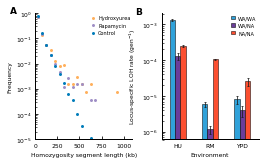

In [8]:
fig = plt.figure(figsize=(4,6))

grid = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[15, 7, 5], hspace=0.7, wspace=0.3)

gs = {}
gs['length'] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=grid[0,0])
gs['fluctuation'] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=grid[0,1])
gs[('loh','WAxNA_F12_1_HU_3')] = gridspec.GridSpecFromSubplotSpec(7, 1, subplot_spec=grid[1:2,:], hspace=0)
gs[('loh','WAxNA_F12_2_RM_1')] = gridspec.GridSpecFromSubplotSpec(5, 1, subplot_spec=grid[2:3,:], hspace=0)

### top left panel ###
ax = plt.subplot(gs['length'][:])
ax.text(-0.185, 1.055, 'A', transform=ax.transAxes,
        fontsize=9, fontweight='bold', va='top', ha='right')

plot.loh_length(loh_length_df, ax)

### top right panel ###
ax = plt.subplot(gs['fluctuation'][:])
ax.text(-0.2, 1.05, 'B', transform=ax.transAxes,
        fontsize=9, fontweight='bold', va='top', ha='right')

plot.loh_fluctuation(loh_fluctuation_df, ax)

# axes limits
for ax in fig.get_axes():
    ax.xaxis.label.set_size(6)
    ax.yaxis.label.set_size(6)
    ax.tick_params(axis='both', which='major', size=3, labelsize=6)
    ax.tick_params(axis='both', which='minor', size=2, labelsize=4)

plot.save_figure(dir_paper+'figures/figure5/figure5')
plt.show()

**Fig. 5:** Pervasive genome instability. (**A**) The length distribution of homozygous segments, in bins corresponding to 50-kb increments, shows an excess of long homozygosity tracts above 300 kb in hydroxyurea and rapamycin (KS-test, $P<0.01$). Ancestral haploid isolates are used to compare a set of *in silico* diploid genomes to evolved diploid isolates. Only unrelated isolate backgrounds were included. (**B**) Background- and environment-dependent rates of loss-of-heterozygosity were measured in a fluctuation assay by loss of the *URA3* marker. 5-FOA+ colonies indicate loss of the marker. LOH rates were elevated in hydroxyurea compared to the control environment and manifested background-dependent effects between the parents and their hybrid. The mean frequency of 5-FOA+ colony-forming units (c.f.u.) is shown. Error bars indicate the standard error of the mean. (**C**) Whole-genome sequences of evolved clones sampled from WAxNA F12 populations after 32 days in hydroxyurea (top) or rapamycin (bottom). Chromosomes are shown on the $x$-axis; clone isolates are listed on the left, colored by lineage (see Fig. S4). The consensus shows the majority genotype across isolates with sequence identity greater than 80%. Individual cells with a shared background genotype carry *de novo* SNPs and indels (circles), mis-segregations with loss-of-heterozygosity (solid segments) and copy-number changes (hatched segments). Driver and passenger mutations are listed along the top (drivers are in boldface). In hydroxyurea, each isolate carries a shared *RNR2* heterozygous mutation and private regions with LOH. Chromosome II has undergone extensive LOH in isolates C5 and C6, which have 13% faster growth rate compared to C1-C4 (Fig. 2D, center panel). In rapamycin, *FPR1* mutant clone C1 is haploid and is related to the diploid clone C3. Both have lost the remaining *FPR1* wild-type copy either by a localized LOH event (C3) or meiosis (C1). An extended version of the figure with all sequenced isolates can be found in Fig. S6.